In [3]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 1.9 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/11.5 MB 1.8 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/11.5 MB 1.8 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.5 MB 1.8 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/11.5 MB 1.9 MB/s eta 0:00:05
   --------- ------------------------------ 2.6/11.5 MB 2.0 MB/s eta 0:00:05
   ---------- ----------------------------- 3.1/11.5 MB 2.0 MB/s eta 0:00:05
   ------------ --------------------------- 3.7/11.5 MB 2.1 MB/s eta 0:00:04
   -------------- ------------------------- 4.2/11.5 MB 2.2 MB/s eta 0:00:04
   ---------------- ----------------------- 4.7/11.5 MB 2.2 MB/s eta 0:00:04
   --------------


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
print(pd.__version__)

2.2.3


In [8]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [9]:
print(customers.head)
print(products.head)
print(transactions.head)

<bound method NDFrame.head of     CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]>
<bound method NDFrame.head of    ProductID              ProductName     Category   Price
0       P001     ActiveWear Biography        Books  169.30
1       P002    ActiveWear Smartwatch  Electronics  3

In [10]:
print(customers.info())
print(customers.describe())
print(products.info())
print(products.describe())
print(transactions.info())
print(transactions.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category

In [13]:
#Convert columns to categorical types for faster computations
unique_regions = customers["Region"].unique()
customers["Region"] = pd.Categorical(customers["Region"], categories=unique_regions)

print(customers.info())
print("Categories:", customers["Region"].cat.categories)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CustomerID    200 non-null    object  
 1   CustomerName  200 non-null    object  
 2   Region        200 non-null    category
 3   SignupDate    200 non-null    object  
dtypes: category(1), object(3)
memory usage: 5.2+ KB
None
Categories: Index(['South America', 'Asia', 'North America', 'Europe'], dtype='object')


In [14]:
#Convert date column to datetype for computations and extractions
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
print(customers.info())                                         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    category      
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), object(2)
memory usage: 5.2+ KB
None


In [15]:
# Identifying year with highest signups and if there is a tread of increase or decrease of signups
customers['Year'] = customers['SignupDate'].dt.year
signup_counts = customers.groupby('Year').size().reset_index(name='SignupCount')
max_signups = signup_counts[signup_counts['SignupCount'] == signup_counts['SignupCount'].max()]
print("Signup Counts by Year:")
print(signup_counts)
print("\nYear(s) with the Highest Signups:")
print(max_signups)

Signup Counts by Year:
   Year  SignupCount
0  2022           64
1  2023           57
2  2024           79

Year(s) with the Highest Signups:
   Year  SignupCount
2  2024           79


In [16]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 2.0 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.0 MB 2.0 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.0 MB 2.0 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.0 MB 2.0 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/8.0 MB 2.1 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.0 MB 2.3 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.0 MB 2.4 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.0 MB 2.5 MB/s eta 0:00:02
   -------------------------- ------------- 5.2/8.0 MB 2.6 MB/s eta 0:00:02
   ---------------------------- ----------- 5.8/8.0 MB 2.6 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.0 MB 2.6 MB/s eta 0:00:01
   ----------------------

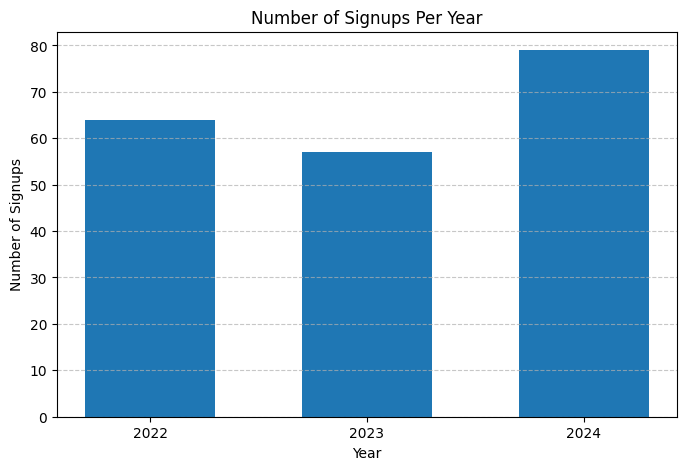

In [18]:
# Visualizing signing analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(signup_counts['Year'], signup_counts['SignupCount'], width=0.6)
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.title('Number of Signups Per Year')
plt.xticks(signup_counts['Year'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

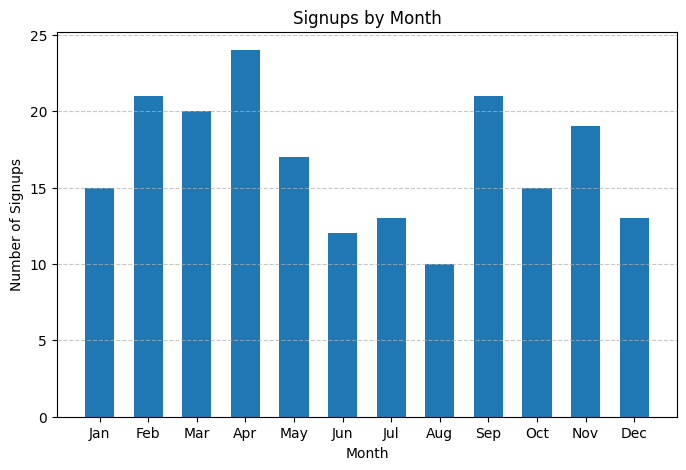

In [19]:
# To visualize if there is a trend with specific months having higher signup count

customers['Month'] = customers['SignupDate'].dt.month
monthly_counts = customers.groupby('Month').size().reset_index(name='SignupCount')

plt.figure(figsize=(8, 5))
plt.bar(monthly_counts['Month'], monthly_counts['SignupCount'], width=0.6, tick_label=range(1, 13))
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.title('Signups by Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [20]:
# Going to explore products dataset
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [22]:
# To convert category of products to category Dtype
unique_categories = products["Category"].unique()
products["Category"] = pd.Categorical(products["Category"], categories=unique_categories)

print(products.info())
print("Categories:", products["Category"].cat.categories)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ProductID    100 non-null    object  
 1   ProductName  100 non-null    object  
 2   Category     100 non-null    category
 3   Price        100 non-null    float64 
dtypes: category(1), float64(1), object(2)
memory usage: 2.8+ KB
None
Categories: Index(['Books', 'Electronics', 'Home Decor', 'Clothing'], dtype='object')


In [24]:
# To split product name into brandname and item name for distilled analysis of brand value 

products[['BrandName', 'ItemName']] = products['ProductName'].str.split(' ',n=1, expand=True)
print(products.head())

  ProductID              ProductName     Category   Price      BrandName  \
0      P001     ActiveWear Biography        Books  169.30     ActiveWear   
1      P002    ActiveWear Smartwatch  Electronics  346.30     ActiveWear   
2      P003  ComfortLiving Biography        Books   44.12  ComfortLiving   
3      P004            BookWorld Rug   Home Decor   95.69      BookWorld   
4      P005          TechPro T-Shirt     Clothing  429.31        TechPro   

     ItemName  
0   Biography  
1  Smartwatch  
2   Biography  
3         Rug  
4     T-Shirt  


In [25]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ProductID    100 non-null    object  
 1   ProductName  100 non-null    object  
 2   Category     100 non-null    category
 3   Price        100 non-null    float64 
 4   BrandName    100 non-null    object  
 5   ItemName     100 non-null    object  
dtypes: category(1), float64(1), object(4)
memory usage: 4.3+ KB
None


In [26]:
# To convert brandname and itemname to category Dtype
unique_brand = products["BrandName"].unique()
unique_item = products["ItemName"].unique()
products["BrandName"] = pd.Categorical(products["BrandName"], categories=unique_brand)
products["ItemName"] = pd.Categorical(products["ItemName"], categories=unique_item)
print(products.info())
print("Brand Categories:", products["BrandName"].cat.categories)
print("Item Categories:", products["ItemName"].cat.categories)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ProductID    100 non-null    object  
 1   ProductName  100 non-null    object  
 2   Category     100 non-null    category
 3   Price        100 non-null    float64 
 4   BrandName    100 non-null    category
 5   ItemName     100 non-null    category
dtypes: category(3), float64(1), object(2)
memory usage: 3.9+ KB
None
Brand Categories: Index(['ActiveWear', 'ComfortLiving', 'BookWorld', 'TechPro', 'SoundWave',
       'HomeSense'],
      dtype='object')
Item Categories: Index(['Biography', 'Smartwatch', 'Rug', 'T-Shirt', 'Cookbook',
       'Bluetooth Speaker', 'Wall Art', 'Desk Lamp', 'Headphones', 'Jacket',
       'Running Shoes', 'Textbook', 'Mystery Book', 'Sweater', 'Cookware Set',
       'Vase', 'Smartphone', 'Novel', 'Jeans', 'Laptop'],
      dtype='object')


C:\Users\aster\AppData\Local\Temp\ipykernel_2148\3798818074.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price = products.groupby('BrandName')['Price'].mean().reset_index()


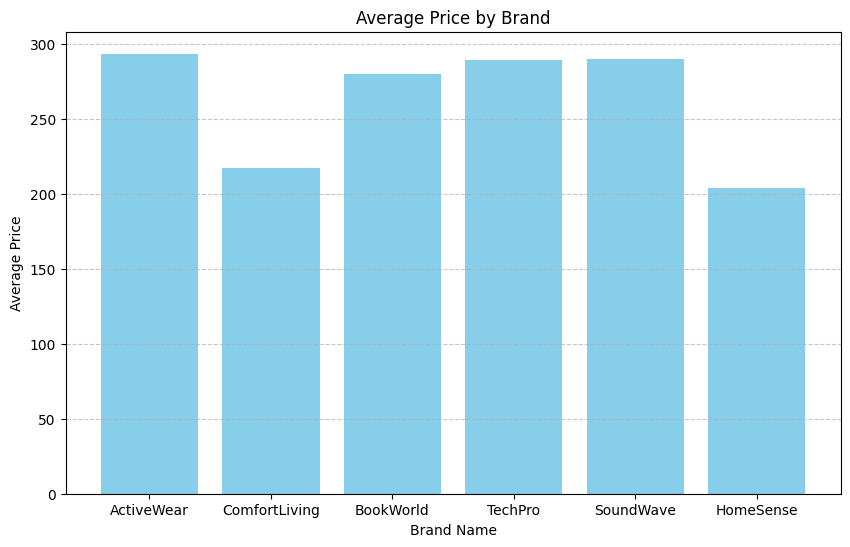

In [27]:
# To find the average pricing of brands to do segment specific marketing for each brand
average_price = products.groupby('BrandName')['Price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(average_price['BrandName'], average_price['Price'], color='skyblue')
plt.xlabel('Brand Name')
plt.ylabel('Average Price')
plt.title('Average Price by Brand')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\aster\AppData\Local\Temp\ipykernel_2148\198380175.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  highest_cost = products.loc[products.groupby('ItemName')['Price'].idxmax()].set_index('ItemName')
C:\Users\aster\AppData\Local\Temp\ipykernel_2148\198380175.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lowest_cost = products.loc[products.groupby('ItemName')['Price'].idxmin()].set_index('ItemName')


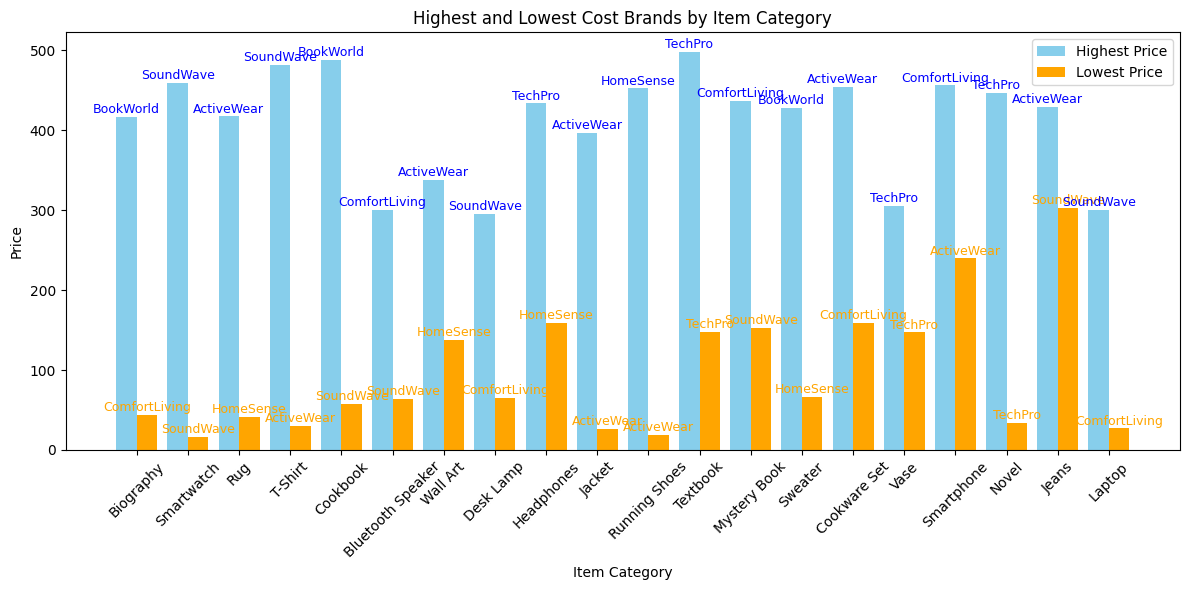

In [29]:
""" as in the above case, the category of products came in the way to analyse brand value, we will split with the item category 
and then try to find brand value"""
highest_cost = products.loc[products.groupby('ItemName')['Price'].idxmax()].set_index('ItemName')
lowest_cost = products.loc[products.groupby('ItemName')['Price'].idxmin()].set_index('ItemName')

comparison = highest_cost[['BrandName', 'Price']].rename(columns={'BrandName': 'Highest Cost Brand', 'Price': 'Highest Price'})
comparison['Lowest Cost Brand'] = lowest_cost['BrandName']
comparison['Lowest Price'] = lowest_cost['Price']

comparison = comparison.reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

width = 0.4
x = range(len(comparison))
ax.bar([p - width / 2 for p in x], comparison['Highest Price'], width=width, label='Highest Price', color='skyblue')
ax.bar([p + width / 2 for p in x], comparison['Lowest Price'], width=width, label='Lowest Price', color='orange')

for i, (hp, lp, hb, lb) in enumerate(zip(comparison['Highest Price'], comparison['Lowest Price'], comparison['Highest Cost Brand'], comparison['Lowest Cost Brand'])):
    ax.text(i - width / 2, hp + 1, hb, ha='center', va='bottom', fontsize=9, color='blue')  # Highest brand
    ax.text(i + width / 2, lp + 1, lb, ha='center', va='bottom', fontsize=9, color='orange')  # Lowest brand

ax.set_xticks(x)
ax.set_xticklabels(comparison['ItemName'], rotation=45)
ax.set_xlabel('Item Category')
ax.set_ylabel('Price')
ax.set_title('Highest and Lowest Cost Brands by Item Category')
ax.legend()

plt.tight_layout()
plt.show()


C:\Users\aster\AppData\Local\Temp\ipykernel_2148\425883213.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_pricing = products.groupby('BrandName')['Price'].agg(['min', 'max']).reset_index()


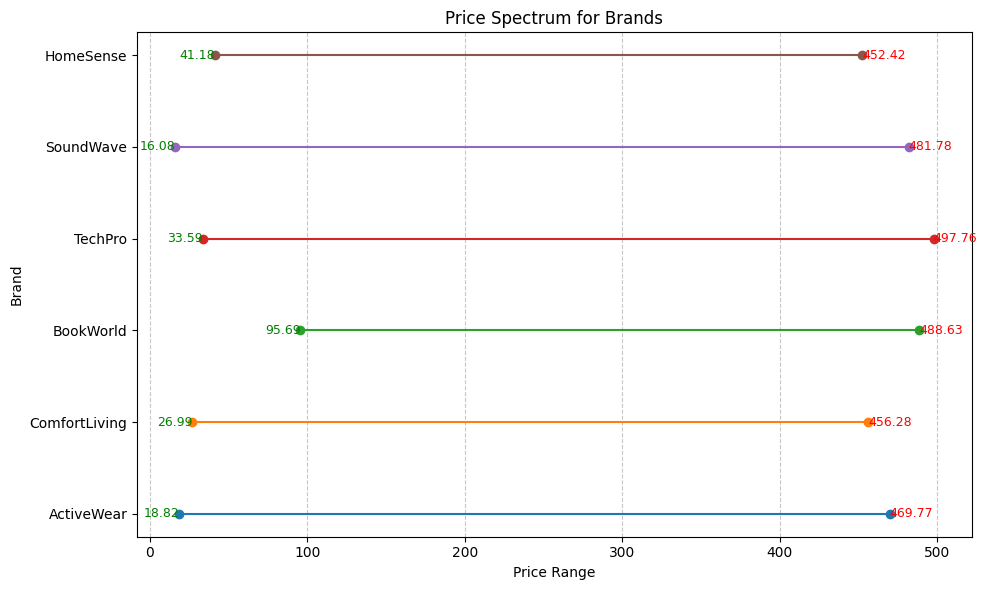

In [30]:
# Want to create a spectrum of brands to self to segments of customeres

brand_pricing = products.groupby('BrandName')['Price'].agg(['min', 'max']).reset_index()
brand_pricing = brand_pricing.rename(columns={'min': 'Lowest Price', 'max': 'Highest Price'})

plt.figure(figsize=(10, 6))
for index, row in brand_pricing.iterrows():
    plt.plot([row['Lowest Price'], row['Highest Price']], [row['BrandName'], row['BrandName']], marker='o')

plt.xlabel('Price Range')
plt.ylabel('Brand')
plt.title('Price Spectrum for Brands')
plt.grid(axis='x', linestyle='--', alpha=0.7)

for _, row in brand_pricing.iterrows():
    plt.text(row['Lowest Price'], row['BrandName'], f"{row['Lowest Price']}", va='center', ha='right', fontsize=9, color='green')
    plt.text(row['Highest Price'], row['BrandName'], f"{row['Highest Price']}", va='center', ha='left', fontsize=9, color='red')

plt.tight_layout()
plt.show()

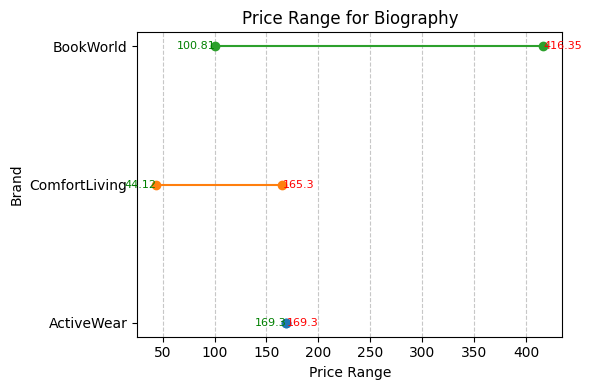

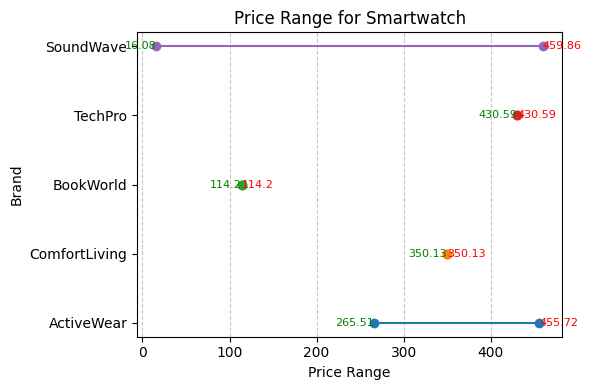

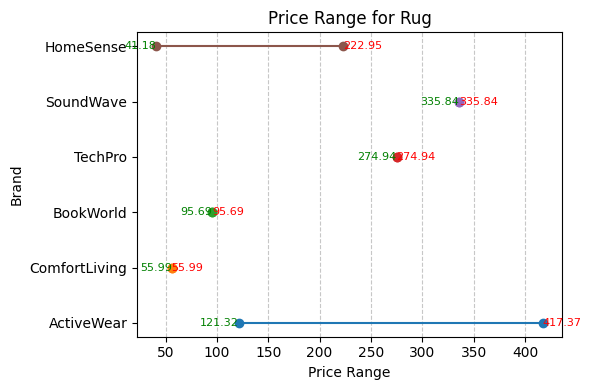

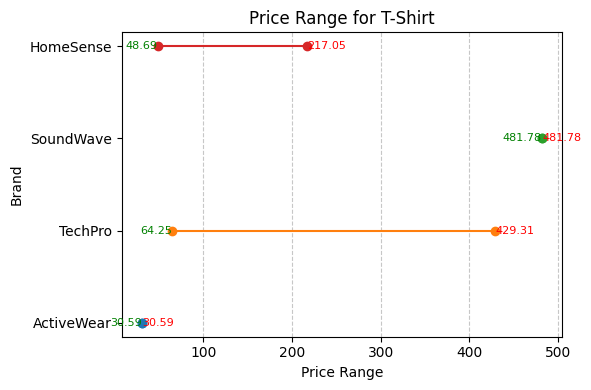

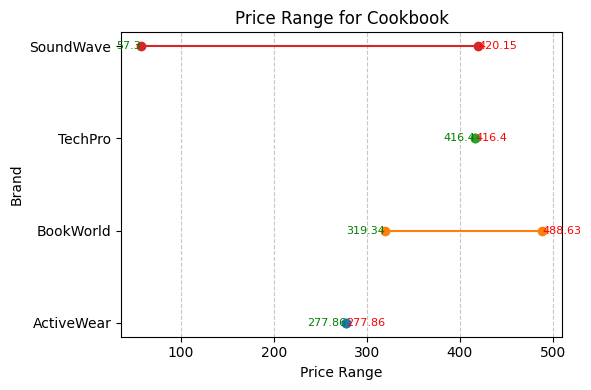

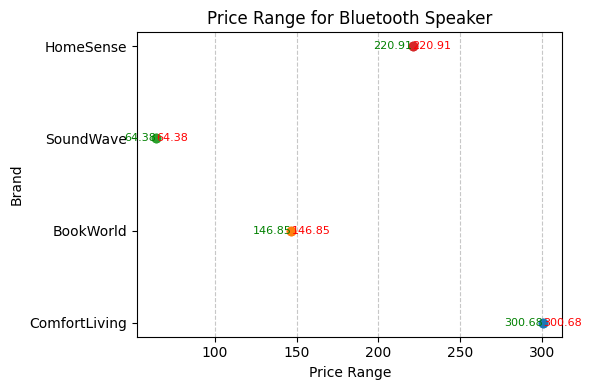

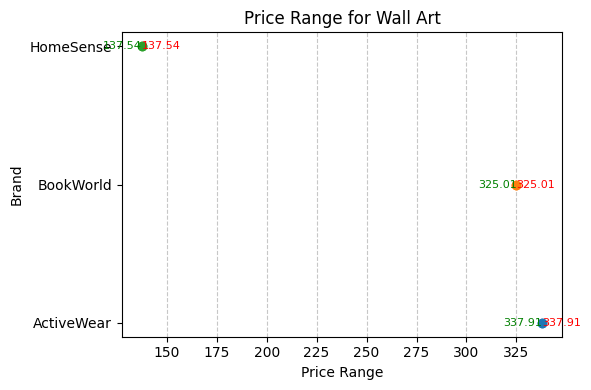

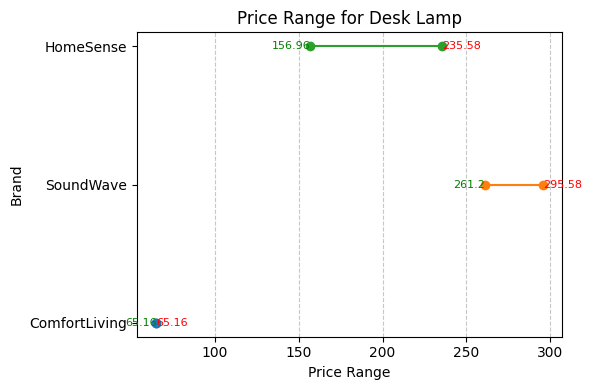

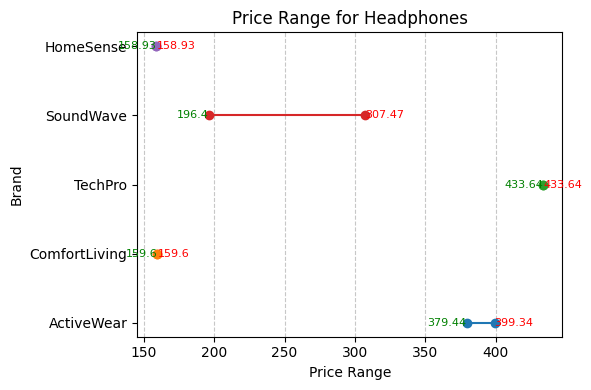

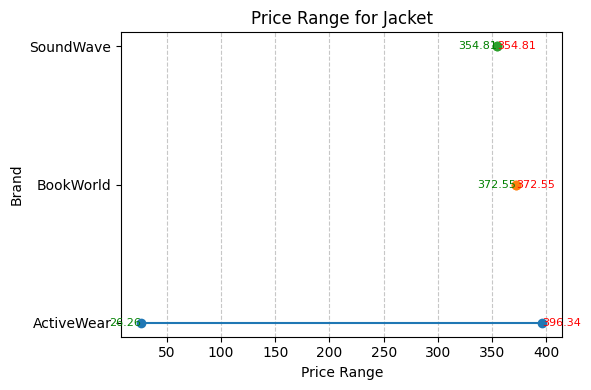

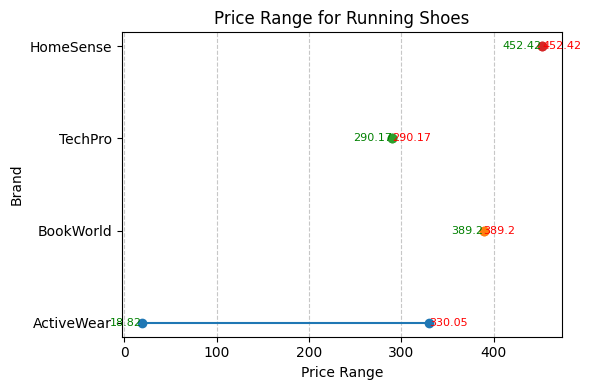

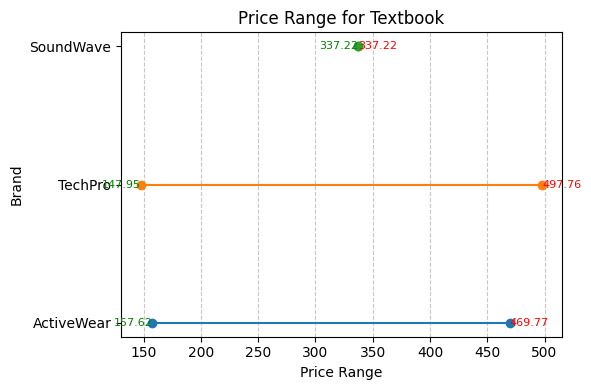

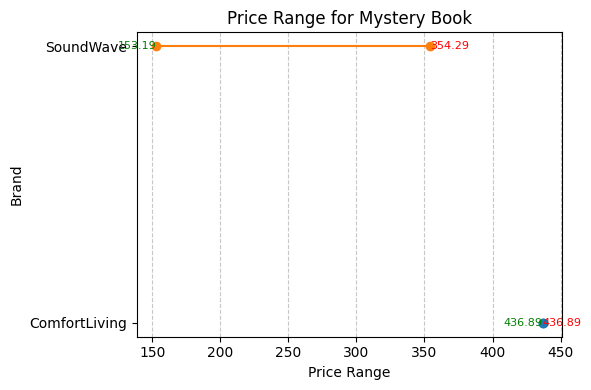

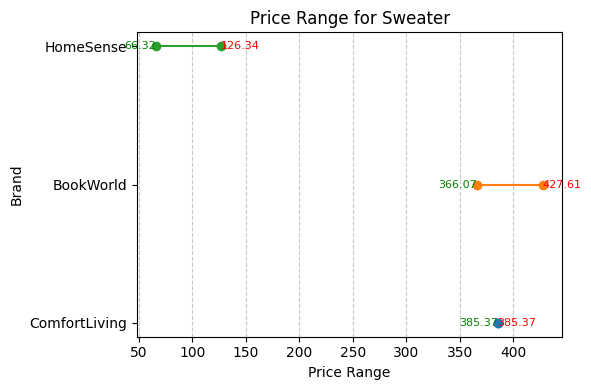

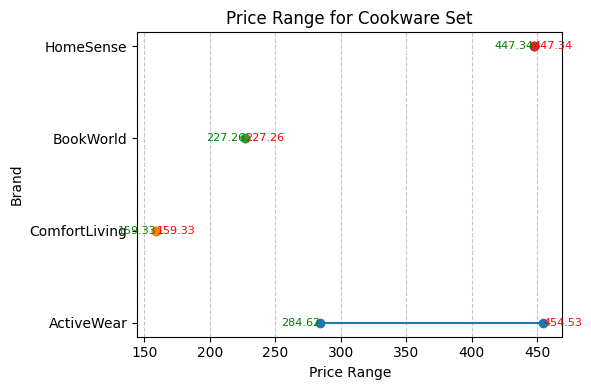

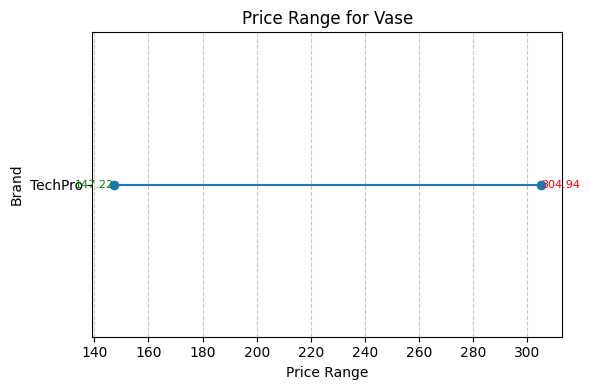

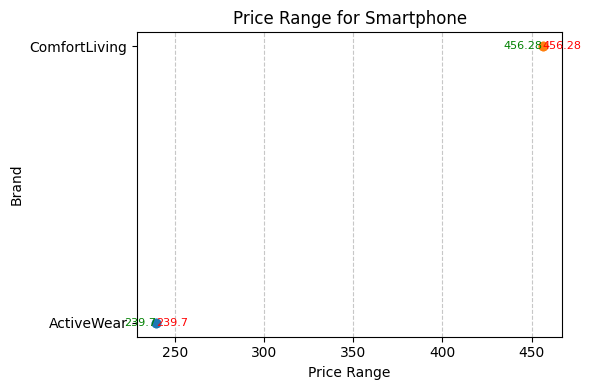

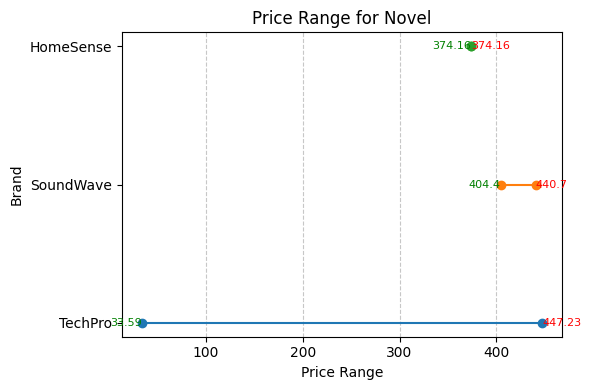

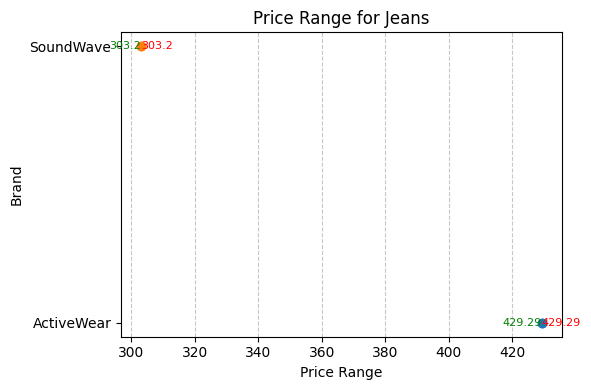

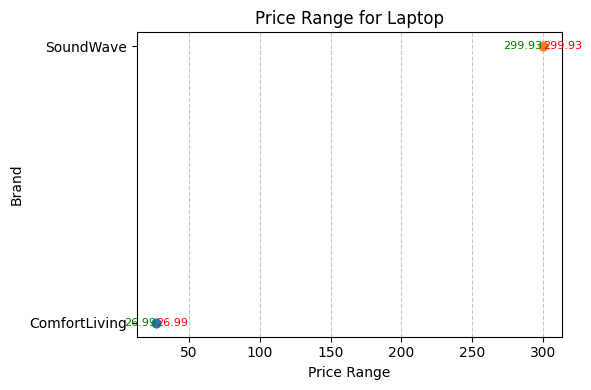

In [35]:
grouped_items = products.groupby('ItemName',observed=True)

for item, group in grouped_items:
    price_range = group.groupby('BrandName', observed=True)['Price'].agg(['min', 'max']).reset_index()
    
    plt.figure(figsize=(6, 4))  # Smaller size
    for _, row in price_range.iterrows():
        plt.plot([row['min'], row['max']], [row['BrandName'], row['BrandName']], marker='o', label=row['BrandName'])
        plt.text(row['min'], row['BrandName'], f"{row['min']}", va='center', ha='right', fontsize=8, color='green')
        plt.text(row['max'], row['BrandName'], f"{row['max']}", va='center', ha='left', fontsize=8, color='red')
    
    plt.xlabel('Price Range')
    plt.ylabel('Brand')
    plt.title(f'Price Range for {item}')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [38]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


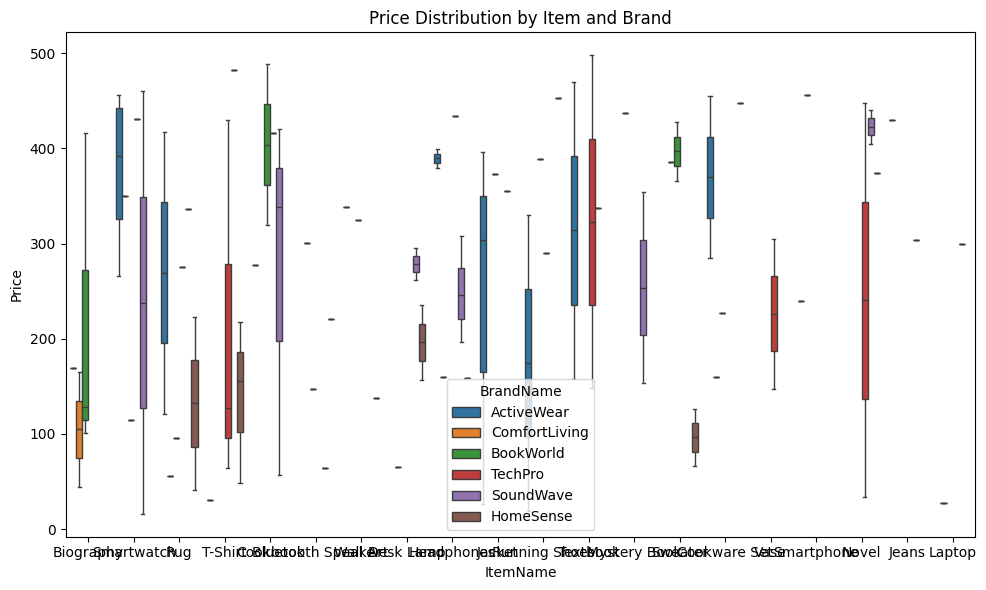

In [39]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='ItemName', y='Price', hue='BrandName', data=products)
plt.title('Price Distribution by Item and Brand')
plt.tight_layout()
plt.show()

In [40]:
# Onto transactions
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [41]:
# Convert TransactionDate to datetime Dtype

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None


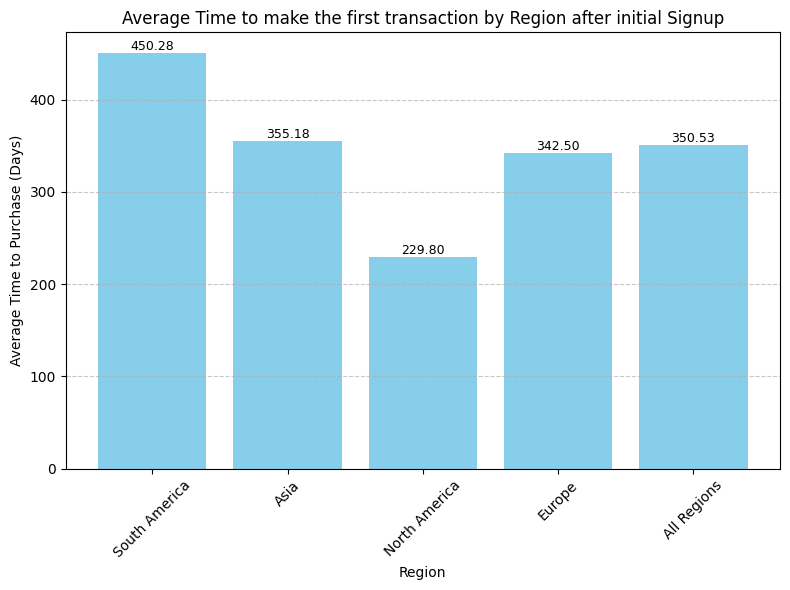

In [44]:
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data['TimeToPurchase'] = (merged_data['TransactionDate'] - merged_data['SignupDate']).dt.total_seconds() / 86400

avg_time_by_region = merged_data.groupby('Region', observed=True)['TimeToPurchase'].mean().reset_index()
overall_avg_time = merged_data['TimeToPurchase'].mean()
avg_time_by_region.loc[len(avg_time_by_region)] = ['All Regions', overall_avg_time]

plt.figure(figsize=(8, 6))
plt.bar(avg_time_by_region['Region'], avg_time_by_region['TimeToPurchase'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Time to Purchase (Days)')
plt.title('Average Time to make the first transaction by Region after initial Signup')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for idx, value in enumerate(avg_time_by_region['TimeToPurchase']):
    plt.text(idx, value + 0.1, f"{value:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

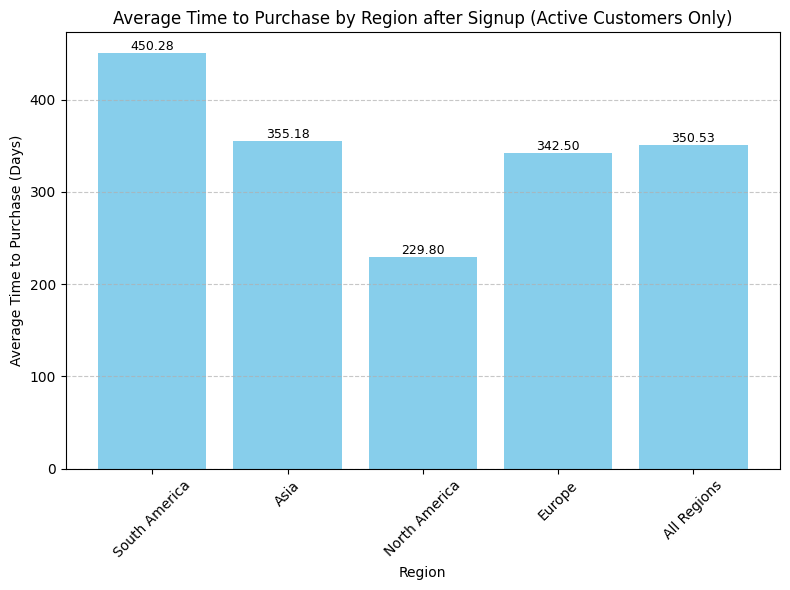

In [45]:
merged_data['TimeToPurchase'] = (merged_data['TransactionDate'] - merged_data['SignupDate']).dt.total_seconds() / 86400

avg_time_by_region = merged_data.groupby('Region', observed=True)['TimeToPurchase'].mean().reset_index()
overall_avg_time = merged_data['TimeToPurchase'].mean()
avg_time_by_region.loc[len(avg_time_by_region)] = ['All Regions', overall_avg_time]

plt.figure(figsize=(8, 6))
plt.bar(avg_time_by_region['Region'], avg_time_by_region['TimeToPurchase'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Time to Purchase (Days)')
plt.title('Average Time to Purchase by Region after Signup (Active Customers Only)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for idx, value in enumerate(avg_time_by_region['TimeToPurchase']):
    plt.text(idx, value + 0.1, f"{value:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

C:\Users\aster\AppData\Local\Temp\ipykernel_2148\1770214867.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inactive_count_by_region = inactive_customers.groupby('Region')['CustomerID'].count().reset_index()


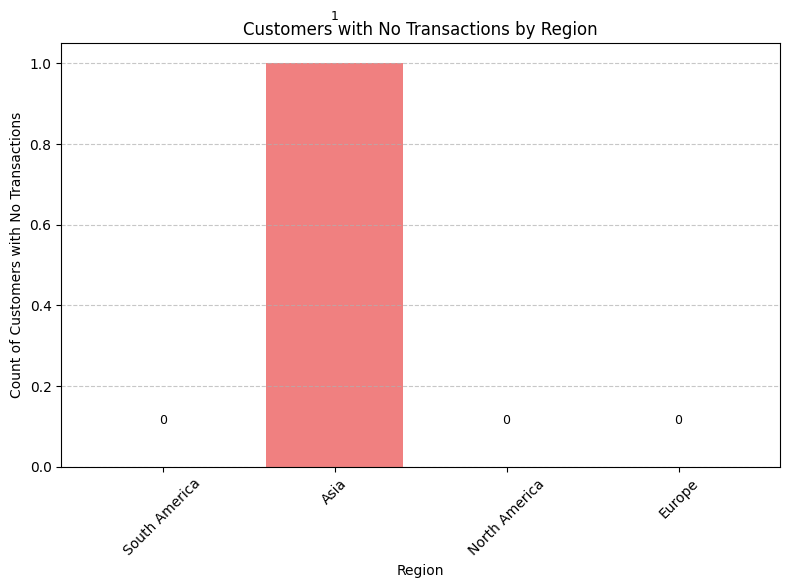

In [46]:
# To find the count of customers with no transactions after signup

inactive_customers = customers[~customers['CustomerID'].isin(transactions['CustomerID'])]
inactive_count_by_region = inactive_customers.groupby('Region')['CustomerID'].count().reset_index()
inactive_count_by_region.columns = ['Region', 'NoTransactionCount']

plt.figure(figsize=(8, 6))
plt.bar(inactive_count_by_region['Region'], inactive_count_by_region['NoTransactionCount'], color='lightcoral')
plt.xlabel('Region')
plt.ylabel('Count of Customers with No Transactions')
plt.title('Customers with No Transactions by Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for idx, value in enumerate(inactive_count_by_region['NoTransactionCount']):
    plt.text(idx, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

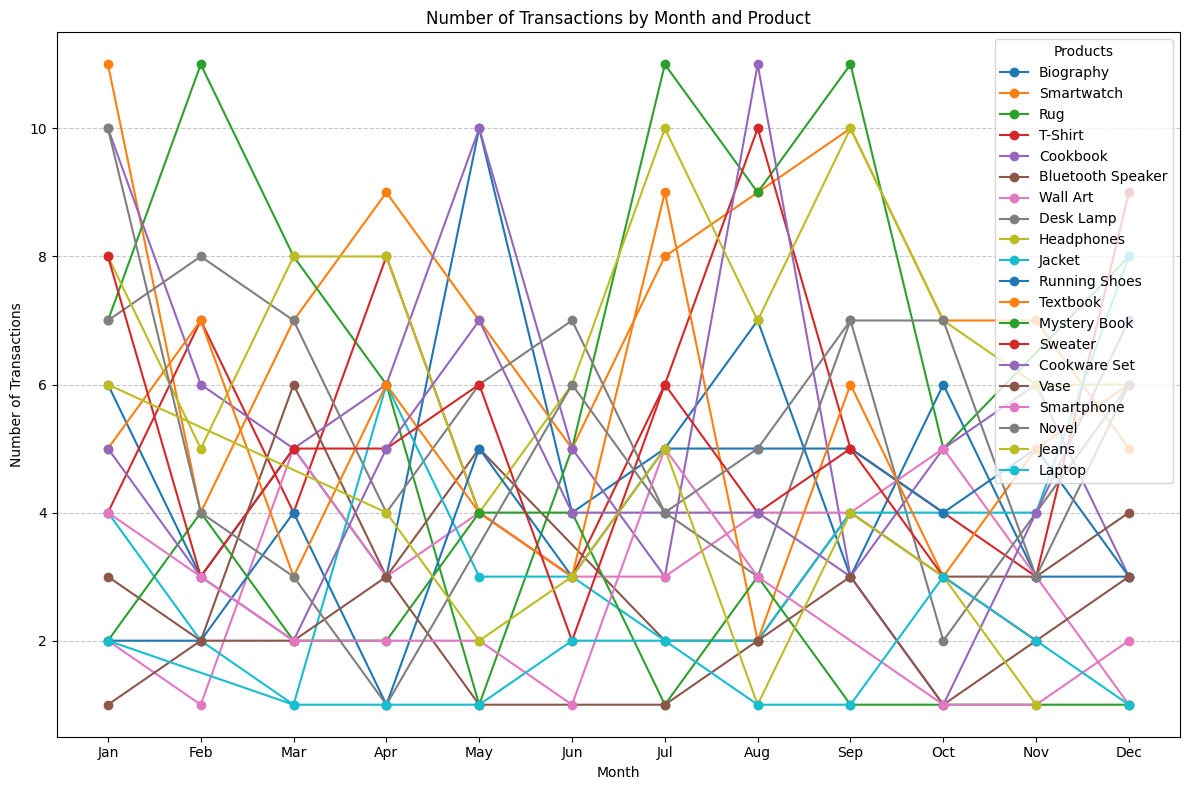

In [48]:
# To find corelation/causation with item sold and months to do stockpiling of specific product before demand arises

transactions['Month'] = transactions['TransactionDate'].dt.month
merged_data = pd.merge(transactions, products, on='ProductID')
monthly_product_data = merged_data.groupby(['Month', 'ItemName'],observed=True).size().reset_index(name='TransactionCount')

plt.figure(figsize=(12, 8))
for product in monthly_product_data['ItemName'].unique():
    product_data = monthly_product_data[monthly_product_data['ItemName'] == product]
    plt.plot(product_data['Month'], product_data['TransactionCount'], marker='o', label=product)

plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Month and Product')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Products')
plt.tight_layout()
plt.show()

C:\Users\aster\AppData\Local\Temp\ipykernel_2148\1408906987.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_product_data = merged_data.groupby(['Month', 'ItemName']).size().reset_index(name='TransactionCount')
C:\Users\aster\AppData\Local\Temp\ipykernel_2148\1408906987.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disparity_data = monthly_product_data.groupby('ItemName')['TransactionCount'].agg(lambda x: x.max() - x.min()).reset_index(name='Disparity')


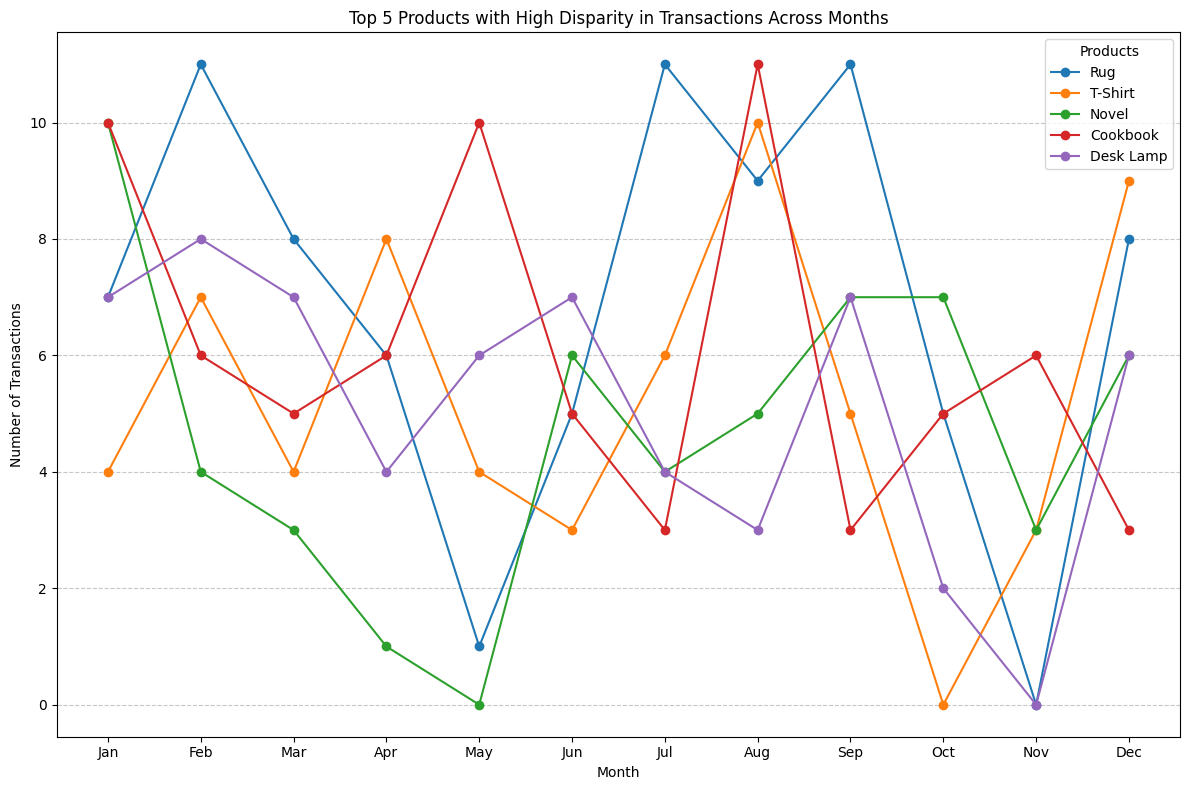

In [50]:
# To display top 5 products with maximum disparty on purchase across months

monthly_product_data = merged_data.groupby(['Month', 'ItemName']).size().reset_index(name='TransactionCount')

disparity_data = monthly_product_data.groupby('ItemName')['TransactionCount'].agg(lambda x: x.max() - x.min()).reset_index(name='Disparity')
top_5_disparity_products = disparity_data.nlargest(5, 'Disparity')

plt.figure(figsize=(12, 8))
for product in top_5_disparity_products['ItemName']:
    product_data = monthly_product_data[monthly_product_data['ItemName'] == product]
    plt.plot(product_data['Month'], product_data['TransactionCount'], marker='o', label=product)

plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Top 5 Products with High Disparity in Transactions Across Months')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Products')
plt.tight_layout()
plt.show()

C:\Users\aster\AppData\Local\Temp\ipykernel_2148\2437149378.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_counts = merged_data.groupby(['Region', 'Hour']).size().reset_index(name='TransactionCount')


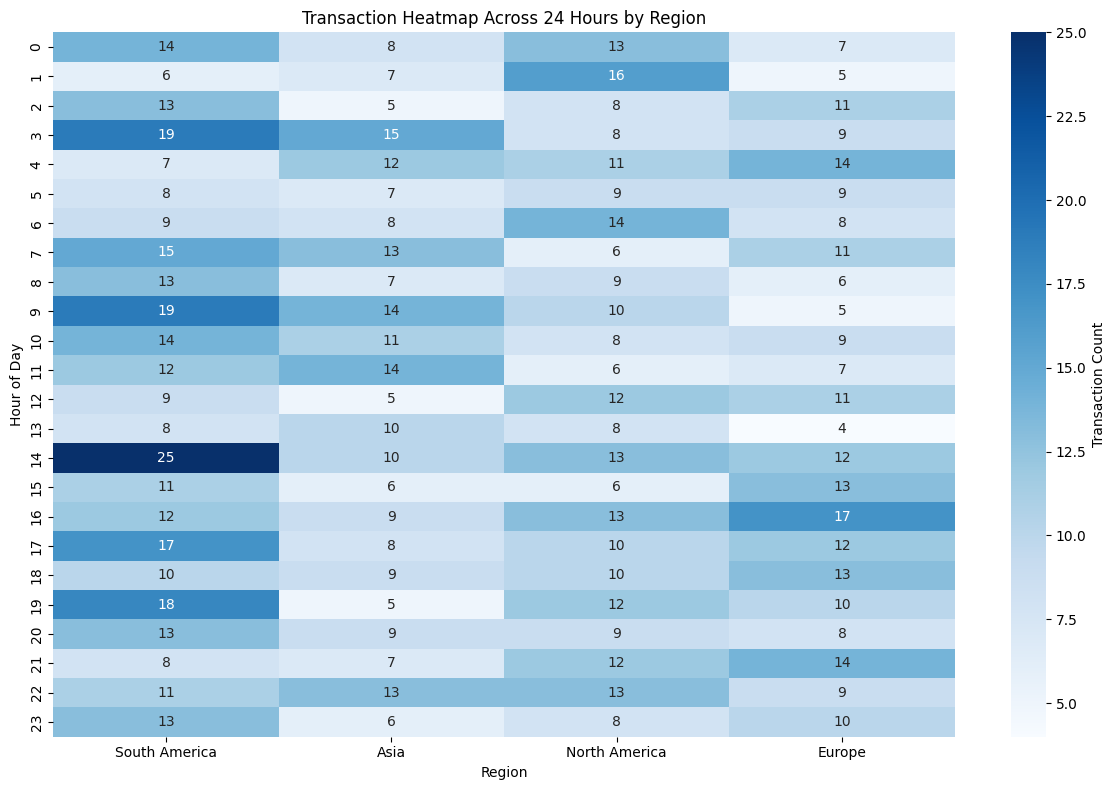

In [52]:
# To find periods of high transactions across regions to help data centers optimize cloud resources

transactions['Hour'] = transactions['TransactionDate'].dt.hour
merged_data = pd.merge(transactions, customers, on='CustomerID')
transaction_counts = merged_data.groupby(['Region', 'Hour']).size().reset_index(name='TransactionCount')

pivot_data = transaction_counts.pivot(index='Hour', columns='Region', values='TransactionCount').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='Blues', annot=True, fmt='g', cbar_kws={'label': 'Transaction Count'})
plt.title('Transaction Heatmap Across 24 Hours by Region')
plt.xlabel('Region')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()